In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
root_dir = '/Users/kessapassa/OneDrive/research_log/20190114/'

In [3]:
dir_list = ['people10000', 'people20000', 'people30000']
seed_list = [str(123 + i) for i in range(3)]
csv_list = ['od']

In [4]:
csv_array = {}
for _dir in dir_list:
    csv_array[_dir] = {}
    for _seed in seed_list:
        csv_array[_dir][_seed] = {}
        for _csv in csv_list:
            df = pd.read_csv(root_dir + 'converted_road_to_area_od/' + _dir + 'seed' + _seed + _csv + '.csv')
            csv_array[_dir][_seed][_csv] = df

In [5]:
people = 'people20000'
seed = '123'
csv = 'od'
df = csv_array[people][seed][csv].copy()
df.shape

(12389, 18)

In [6]:
def create_origin_destination(df):
    df_base = pd.DataFrame(columns=['origin', 'destination'])
    
    for row in df.values.tolist():
        row = [x for x in row if not np.isnan(x)]
        df_row = pd.DataFrame([[row[0], row[-1]]], columns=df_base.columns)
        df_base = pd.concat([df_base, df_row])

    df_base.reset_index(drop=True, inplace=True)
    return df_base

In [7]:
# df = df.dropna(how='all')
# create_origin_destination(df)

In [8]:
for _dir in dir_list:
    for _seed in seed_list:
        for _csv in csv_list:
            df = csv_array[_dir][_seed][_csv].copy()
            df = df.dropna(how='all')
            df = create_origin_destination(df)
#             csv_array[_dir][_seed][_csv] = df
#             df.to_csv(root_dir + 'origin_destination_od/' + _dir + 'seed' + _seed + _csv + '.csv', index=False)

In [9]:
def create_2d(df, col_name):
    df_area = pd.DataFrame(np.zeros((81, 2)), columns=['area', 'people'])
    df_area['area'] = [float(i) for i in range(81)]
    
    for r in df.loc[:, col_name]:
        df_area.loc[r, 'people'] += 1
    
    return df_area

In [10]:
csv_array = {}
for _dir in dir_list:
    csv_array[_dir] = {}
    for _seed in seed_list:
        csv_array[_dir][_seed] = {}
        for _csv in csv_list:
            csv_array[_dir][_seed][_csv] = {}
            
            df = pd.read_csv(root_dir + 'origin_destination_od/' + _dir + 'seed' + _seed + _csv + '.csv')
            for _col in ['origin', 'destination']:
                df_2d = create_2d(df, _col)
                csv_array[_dir][_seed][_csv][_col] = df_2d
#                 df_2d.to_csv(root_dir + 'origin_destination_od_2D/' + _dir + 'seed' + _seed + _csv + '_' + _col + '.csv')

In [13]:
for _dir in dir_list:
    for _seed in seed_list:
        for _csv in csv_list:
            for _col in ['origin', 'destination']:
                df = pd.read_csv(root_dir + 'origin_destination_od_2D/' + _dir + 'seed' + _seed + _csv + '_' + _col + '.csv')

                df_new = pd.DataFrame()
                for i in range(9):
                    tmp = df.loc[i*9:i*9+8, 'people']
                    tmp.reset_index(drop=True, inplace=True)
                    df_new = pd.concat([df_new, tmp], axis=1)

                df_new = df_new.T
                df_new.columns=(['{0:02d}'.format(i*10) for i in range(9)])
                df_new.index=([str(i) for i in range(9)])
                df = df_new
                print(_dir, _seed, _col)
                print(df.sum().sum())
#                 df.to_csv(root_dir + 'origin_destination_od_3D/' + _dir + 'seed' + _seed + _csv + '_' + _col + '.csv')

In [23]:
csv_array_2d = {}
for _dir in dir_list:
    csv_array_2d[_dir] = {}
    for _seed in seed_list:
        csv_array_2d[_dir][_seed] = {}
        for _csv in csv_list:
            csv_array_2d[_dir][_seed][_csv] = {}
            for _col in ['origin', 'destination']:
                df = pd.read_csv(root_dir + 'origin_destination_od_2D/' + _dir + 'seed' + _seed + _csv + '_' + _col + '.csv', index_col=0)
                csv_array_2d[_dir][_seed][_csv][_col] = df

In [27]:
def area_to_contour(area_id):
    area_one_length = 9
    area_id = int(area_id)
    left = str(area_id // area_one_length)
    right = str(area_id % area_one_length) + '0'
    return left+right

In [28]:
df = csv_array_2d[people][seed][csv]['origin'].copy()
df['area'] = df['area'].apply(area_to_contour)
df.sort_values(['people'], ascending=False)

,area,people
40,440,2890.0
49,540,2279.0
50,550,2232.0
41,450,1654.0
58,640,1196.0
31,340,373.0
30,330,340.0
19,210,188.0
59,650,158.0
48,530,155.0


In [16]:
csv_array_3d = {}
for _dir in dir_list:
    csv_array_3d[_dir] = {}
    for _seed in seed_list:
        csv_array_3d[_dir][_seed] = {}
        for _csv in csv_list:
            csv_array_3d[_dir][_seed][_csv] = {}
            for _col in ['origin', 'destination']:
                df = pd.read_csv(root_dir + 'origin_destination_od_3D/' + _dir + 'seed' + _seed + _csv + '_' + _col + '.csv', index_col=0)
                csv_array_3d[_dir][_seed][_csv][_col] = df

In [20]:
import seaborn as sns
def create_contour(df):
    plt.figure(figsize=(9,6))
    sns.heatmap(df, annot=True, fmt='.0f', cmap='RdYlGn_r',
               vmax=df.sum().mean(), vmin=0)

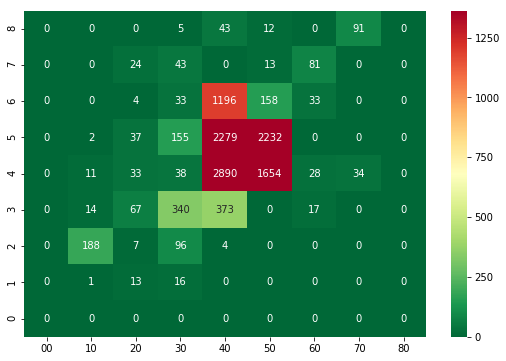

In [21]:
df = csv_array_3d[people][seed][csv]['origin'].copy()
df = df.sort_index(ascending=False)
create_contour(df)

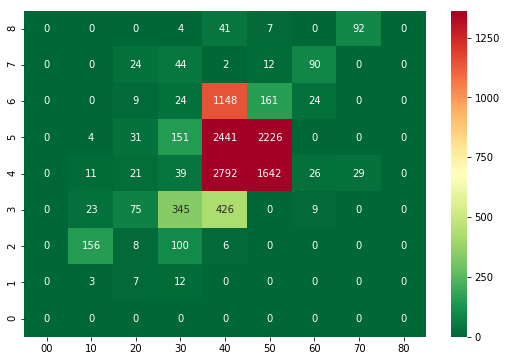

In [22]:
df = csv_array_3d[people][seed][csv]['destination'].copy()
df = df.sort_index(ascending=False)
create_contour(df)